In [1]:
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import torchvision
import time
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from sklearn.metrics import confusion_matrix
import pandas as pd
import os

In [2]:
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images,_ in loader:
        images_count_in_batch = images.size(0)
#         print(images.shape)
        images =images.view(images_count_in_batch,images.size(1),-1)
        mean+=images.mean(2).sum(0)
        std+=images.std(2).sum(0)
        total_images_count+=images_count_in_batch
    mean /= total_images_count
    std /= total_images_count
    return mean,std

In [3]:
def train_transform(dataset):
    train_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    train_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=train_transforms)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
    mean,std=get_mean_std(train_loader)
    train_transforms = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    data_set=torchvision.datasets.ImageFolder(root=dataset,transform=train_transforms)
    return data_set

In [4]:
train_dataset='../Datasets/dataset_2_classes/train/'
training_dataset=train_transform(train_dataset)

In [5]:
test_dataset='../Datasets/dataset_2_classes/test/'
testing_dataset=train_transform(test_dataset)

In [6]:
validate_dataset='../Datasets/dataset_2_classes/validate/'
validating_dataset=train_transform(validate_dataset)

In [7]:
lr=[0.05,0.1,0.15,0.2]
Batchs=[32,64,128]
epochs=[25,35]

In [8]:
def set_device():
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    return device

In [9]:
resnet18_Model = models.resnet18(pretrained=False, num_classes=2)

/Users/bhanuprakash/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bhanuprakash/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
device=set_device()
resnet18_Model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
from statistics import mean
best_accuracy=0.0

Learning Rate: 0.050 
Batch Size: 32 
Epoch size: 25 
Epoch: 1 
Training Data: Epoch Loss: 0.507, Epoch Accuracy: 78.906, Validation Loss: 3.108,Validation Accuracy: 76.748
Epoch: 2 
Training Data: Epoch Loss: 0.233, Epoch Accuracy: 89.746, Validation Loss: 0.389,Validation Accuracy: 86.778
Epoch: 3 
Training Data: Epoch Loss: 0.198, Epoch Accuracy: 92.285, Validation Loss: 0.365,Validation Accuracy: 88.754
Epoch: 4 
Training Data: Epoch Loss: 0.141, Epoch Accuracy: 94.922, Validation Loss: 0.247,Validation Accuracy: 91.033
Epoch: 5 
Training Data: Epoch Loss: 0.086, Epoch Accuracy: 96.777, Validation Loss: 0.249,Validation Accuracy: 91.793
Epoch: 6 
Training Data: Epoch Loss: 0.088, Epoch Accuracy: 96.582, Validation Loss: 1.182,Validation Accuracy: 87.994
Epoch: 7 
Training Data: Epoch Loss: 0.052, Epoch Accuracy: 98.242, Validation Loss: 0.228,Validation Accuracy: 94.377
Epoch: 8 
Training Data: Epoch Loss: 0.070, Epoch Accuracy: 97.070, Validation Loss: 0.184,Validation Accuracy: 9

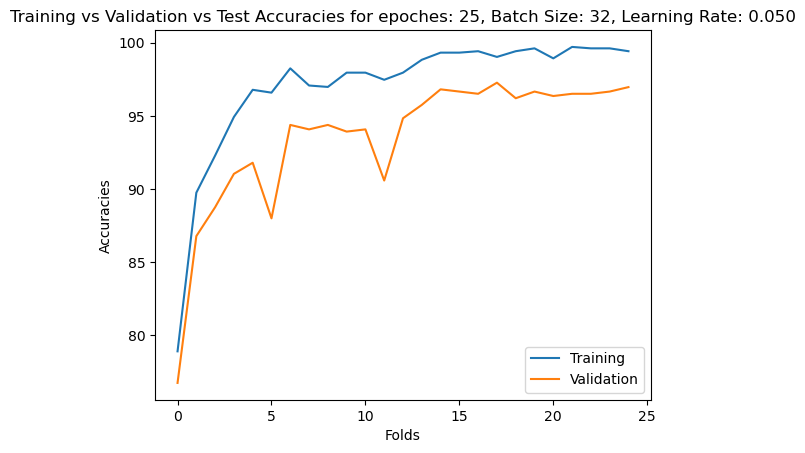

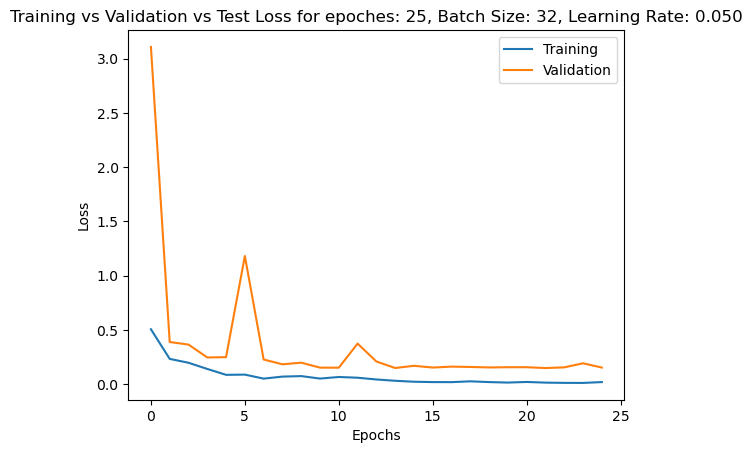

Epoch size: 35 
Epoch: 1 
Training Data: Epoch Loss: 0.017, Epoch Accuracy: 99.414, Validation Loss: 0.176,Validation Accuracy: 96.657
Epoch: 2 
Training Data: Epoch Loss: 0.016, Epoch Accuracy: 99.512, Validation Loss: 0.114,Validation Accuracy: 96.809
Epoch: 3 
Training Data: Epoch Loss: 0.019, Epoch Accuracy: 99.316, Validation Loss: 0.125,Validation Accuracy: 96.201
Epoch: 4 
Training Data: Epoch Loss: 0.012, Epoch Accuracy: 99.512, Validation Loss: 0.146,Validation Accuracy: 97.112
Epoch: 5 
Training Data: Epoch Loss: 0.015, Epoch Accuracy: 99.609, Validation Loss: 0.145,Validation Accuracy: 96.505
Epoch: 6 
Training Data: Epoch Loss: 0.038, Epoch Accuracy: 98.535, Validation Loss: 0.215,Validation Accuracy: 96.201
Epoch: 7 
Training Data: Epoch Loss: 0.033, Epoch Accuracy: 98.828, Validation Loss: 0.276,Validation Accuracy: 94.833
Epoch: 8 
Training Data: Epoch Loss: 0.060, Epoch Accuracy: 97.363, Validation Loss: 0.149,Validation Accuracy: 96.049
Epoch: 9 
Training Data: Epoch L

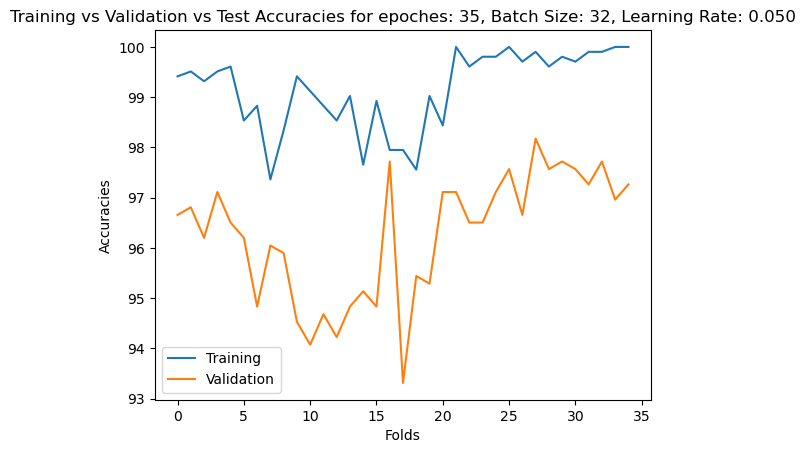

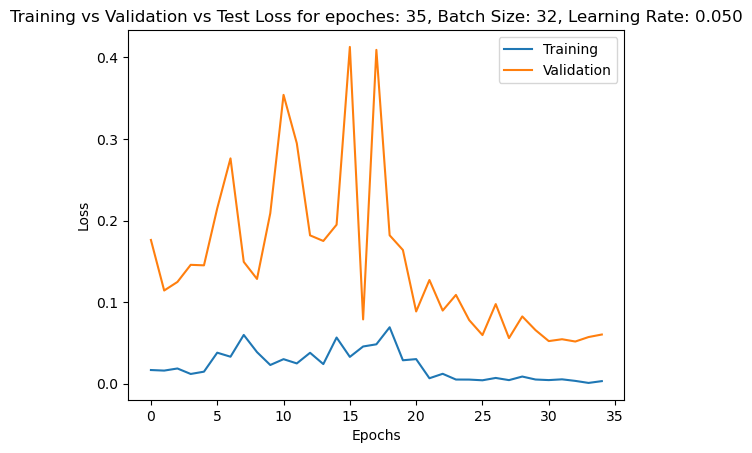

Batch Size: 64 
Epoch size: 25 
Epoch: 1 
Training Data: Epoch Loss: 0.003, Epoch Accuracy: 99.902, Validation Loss: 0.062,Validation Accuracy: 97.416
Epoch: 2 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.060,Validation Accuracy: 97.416
Epoch: 3 
Training Data: Epoch Loss: 0.002, Epoch Accuracy: 100.000, Validation Loss: 0.054,Validation Accuracy: 97.416
Epoch: 4 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.053,Validation Accuracy: 97.264
Epoch: 5 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.055,Validation Accuracy: 97.264
Epoch: 6 
Training Data: Epoch Loss: 0.003, Epoch Accuracy: 99.902, Validation Loss: 0.049,Validation Accuracy: 98.328
Epoch: 7 
Training Data: Epoch Loss: 0.002, Epoch Accuracy: 100.000, Validation Loss: 0.057,Validation Accuracy: 97.416
Epoch: 8 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.055,Validation Accuracy: 97.416
Epoch: 9 


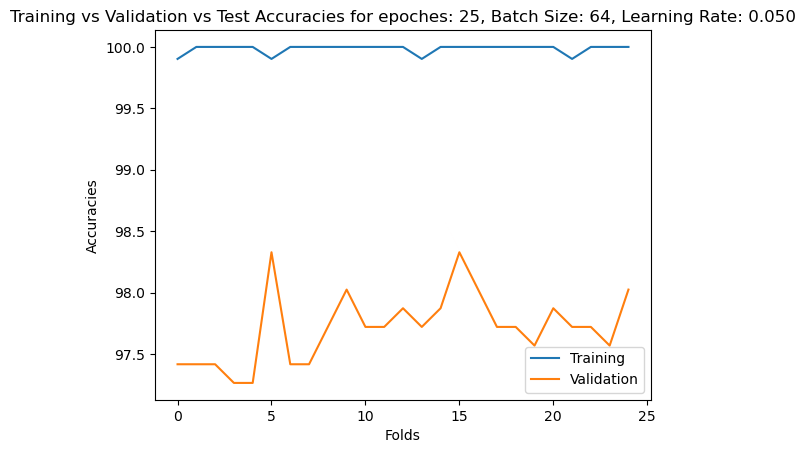

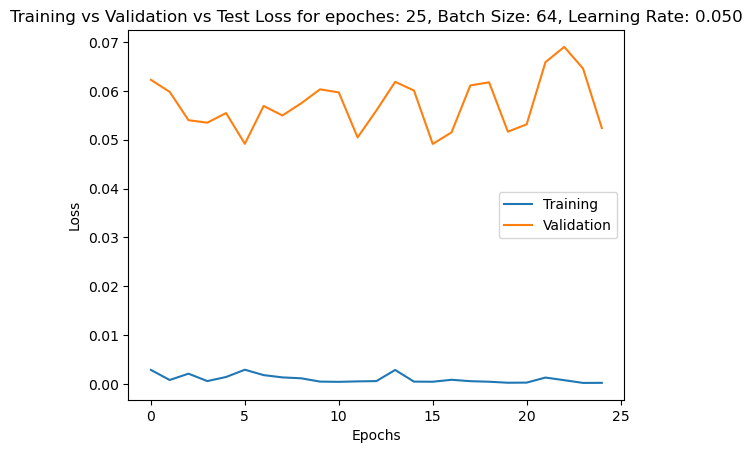

Epoch size: 35 
Epoch: 1 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.051,Validation Accuracy: 98.176
Epoch: 2 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.053,Validation Accuracy: 98.176
Epoch: 3 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.039,Validation Accuracy: 98.632
Epoch: 4 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.042,Validation Accuracy: 98.632
Epoch: 5 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.051,Validation Accuracy: 98.632
Epoch: 6 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.052,Validation Accuracy: 97.720
Epoch: 7 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.046,Validation Accuracy: 98.480
Epoch: 8 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.055,Validation Accuracy: 98.176
Epoch: 9 
Training Data:

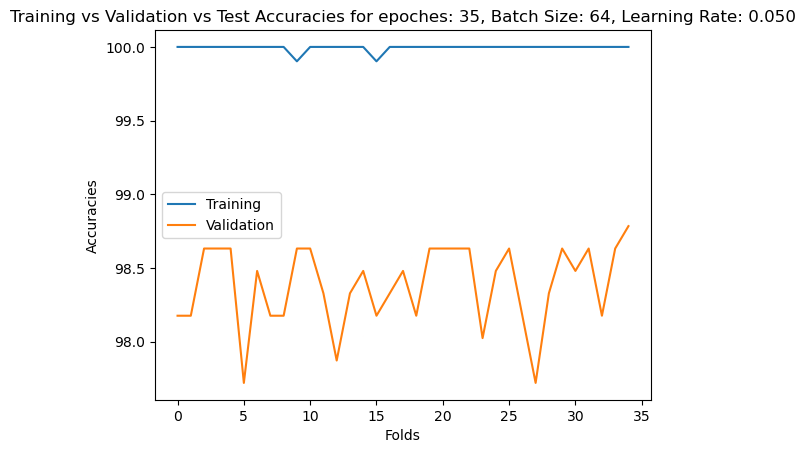

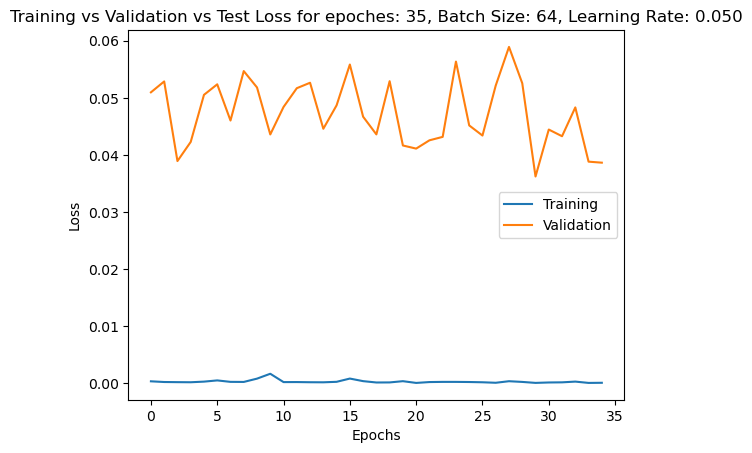

Batch Size: 128 
Epoch size: 25 
Epoch: 1 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.047,Validation Accuracy: 98.328
Epoch: 2 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.048,Validation Accuracy: 98.632
Epoch: 3 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.058,Validation Accuracy: 98.328
Epoch: 4 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.053,Validation Accuracy: 98.632
Epoch: 5 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.036,Validation Accuracy: 98.632
Epoch: 6 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.052,Validation Accuracy: 98.176
Epoch: 7 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.044,Validation Accuracy: 98.480
Epoch: 8 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.052,Validation Accuracy: 98.480
Epoch: 

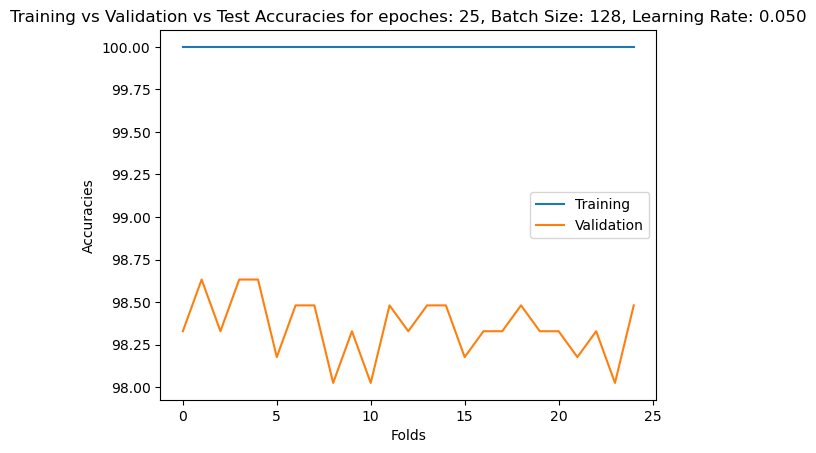

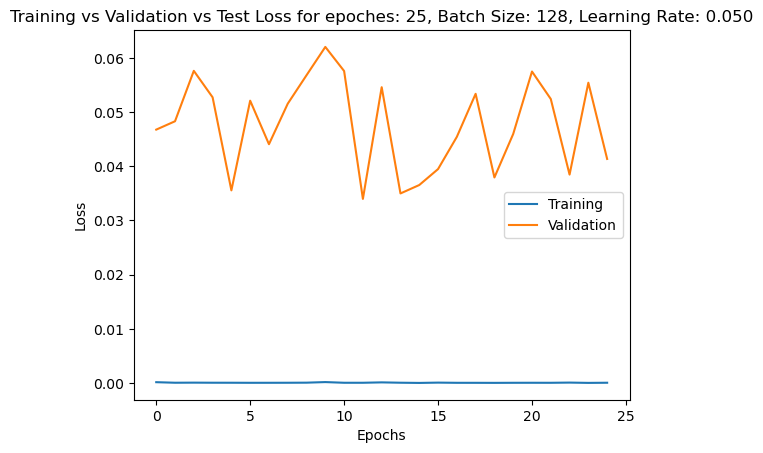

Epoch size: 35 
Epoch: 1 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.040,Validation Accuracy: 98.480
Epoch: 2 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.041,Validation Accuracy: 98.480
Epoch: 3 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.043,Validation Accuracy: 98.176
Epoch: 4 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.038,Validation Accuracy: 98.328
Epoch: 5 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.038,Validation Accuracy: 98.480
Epoch: 6 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.035,Validation Accuracy: 98.632
Epoch: 7 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.054,Validation Accuracy: 98.176
Epoch: 8 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.045,Validation Accuracy: 98.328
Epoch: 9 
Training Data:

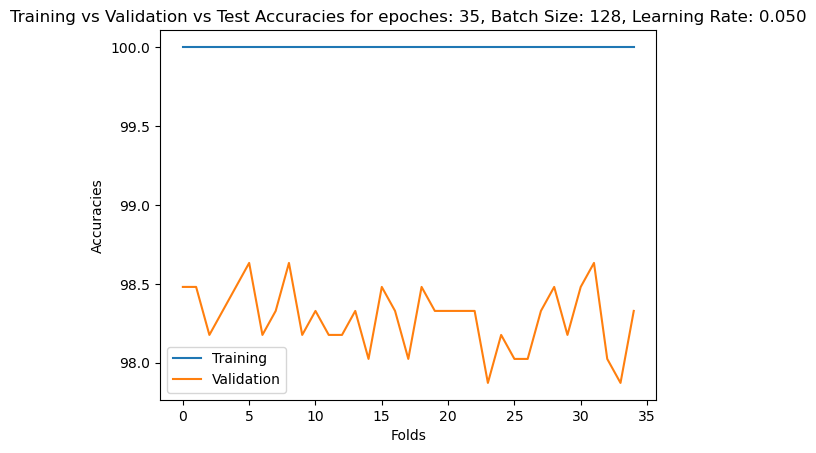

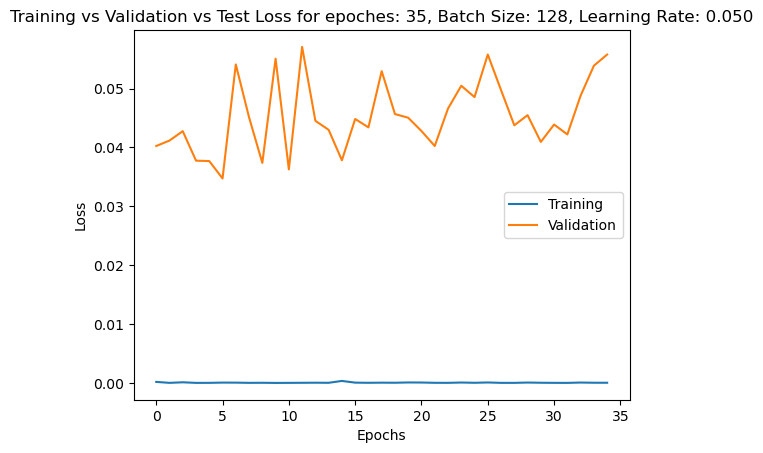

Learning Rate: 0.100 
Batch Size: 32 
Epoch size: 25 
Epoch: 1 
Training Data: Epoch Loss: 0.013, Epoch Accuracy: 99.707, Validation Loss: 2.255,Validation Accuracy: 81.155
Epoch: 2 
Training Data: Epoch Loss: 0.157, Epoch Accuracy: 93.945, Validation Loss: 0.561,Validation Accuracy: 85.410
Epoch: 3 
Training Data: Epoch Loss: 0.098, Epoch Accuracy: 96.191, Validation Loss: 0.313,Validation Accuracy: 93.617
Epoch: 4 
Training Data: Epoch Loss: 0.062, Epoch Accuracy: 98.340, Validation Loss: 0.194,Validation Accuracy: 93.313
Epoch: 5 
Training Data: Epoch Loss: 0.042, Epoch Accuracy: 98.633, Validation Loss: 0.107,Validation Accuracy: 96.353
Epoch: 6 
Training Data: Epoch Loss: 0.032, Epoch Accuracy: 98.730, Validation Loss: 0.053,Validation Accuracy: 97.416
Epoch: 7 
Training Data: Epoch Loss: 0.032, Epoch Accuracy: 99.121, Validation Loss: 0.083,Validation Accuracy: 97.720
Epoch: 8 
Training Data: Epoch Loss: 0.009, Epoch Accuracy: 99.609, Validation Loss: 0.086,Validation Accuracy: 9

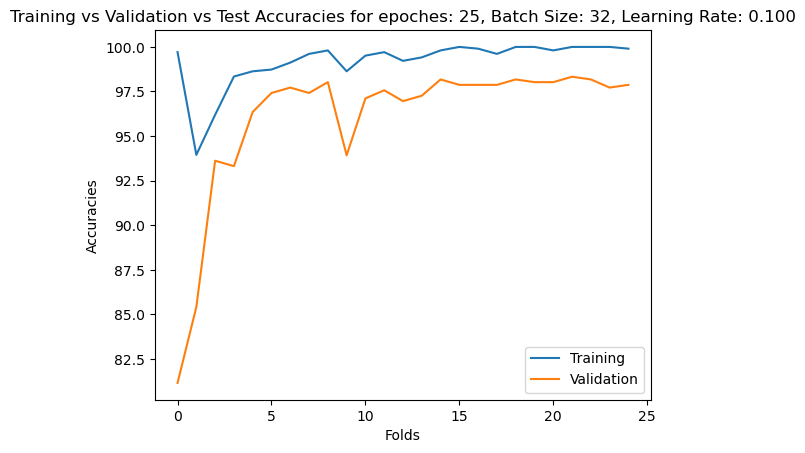

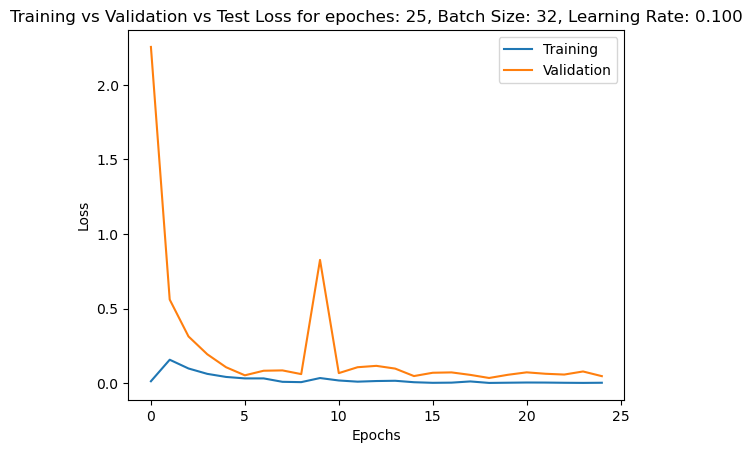

Epoch size: 35 
Epoch: 1 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.060,Validation Accuracy: 98.176
Epoch: 2 
Training Data: Epoch Loss: 0.006, Epoch Accuracy: 99.805, Validation Loss: 0.056,Validation Accuracy: 98.024
Epoch: 3 
Training Data: Epoch Loss: 0.003, Epoch Accuracy: 99.902, Validation Loss: 0.040,Validation Accuracy: 98.632
Epoch: 4 
Training Data: Epoch Loss: 0.001, Epoch Accuracy: 100.000, Validation Loss: 0.051,Validation Accuracy: 98.024
Epoch: 5 
Training Data: Epoch Loss: 0.005, Epoch Accuracy: 99.805, Validation Loss: 0.044,Validation Accuracy: 98.936
Epoch: 6 
Training Data: Epoch Loss: 0.017, Epoch Accuracy: 99.414, Validation Loss: 0.647,Validation Accuracy: 97.416
Epoch: 7 
Training Data: Epoch Loss: 0.015, Epoch Accuracy: 99.414, Validation Loss: 0.105,Validation Accuracy: 96.960
Epoch: 8 
Training Data: Epoch Loss: 0.008, Epoch Accuracy: 99.707, Validation Loss: 0.071,Validation Accuracy: 98.024
Epoch: 9 
Training Data: Epoch

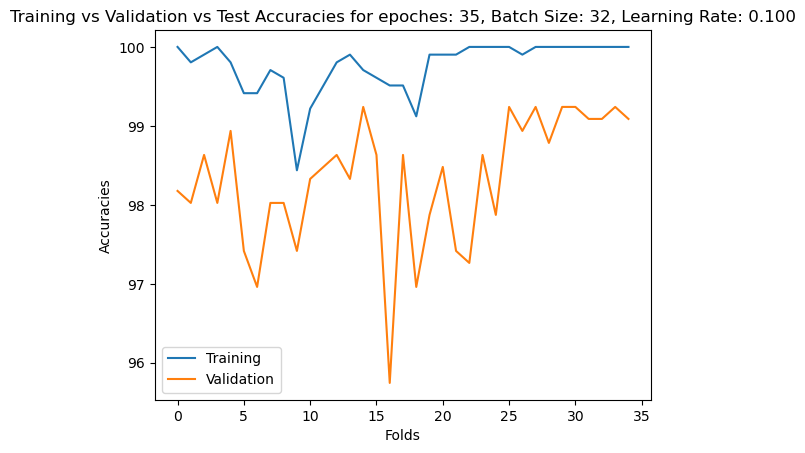

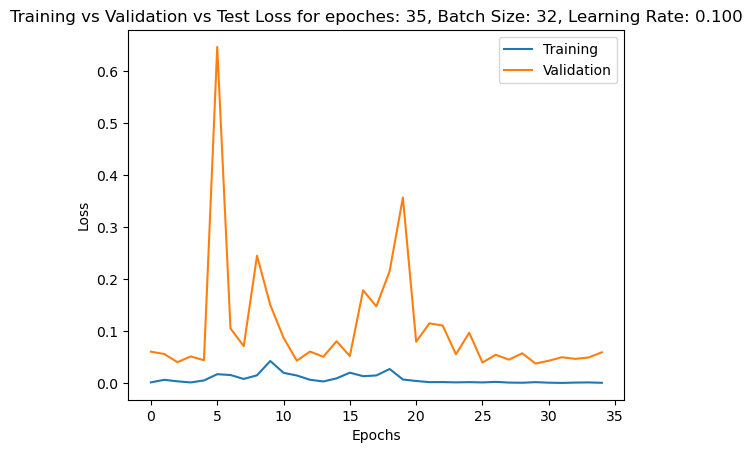

Batch Size: 64 
Epoch size: 25 
Epoch: 1 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.041,Validation Accuracy: 98.936
Epoch: 2 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.047,Validation Accuracy: 99.088
Epoch: 3 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.055,Validation Accuracy: 99.088
Epoch: 4 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.045,Validation Accuracy: 98.936
Epoch: 5 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.049,Validation Accuracy: 99.088
Epoch: 6 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.052,Validation Accuracy: 98.632
Epoch: 7 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.054,Validation Accuracy: 98.632
Epoch: 8 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.047,Validation Accuracy: 99.088
Epoch: 9

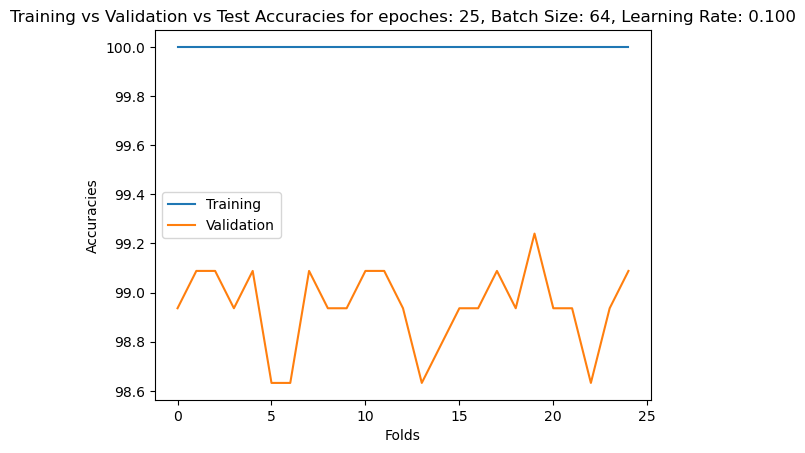

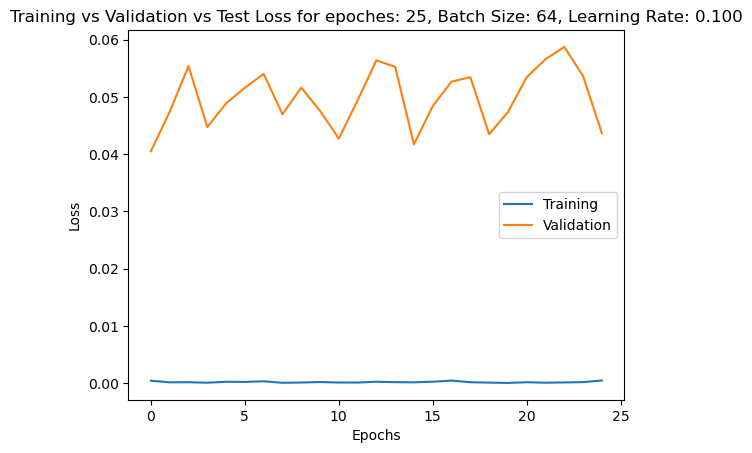

Epoch size: 35 
Epoch: 1 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.052,Validation Accuracy: 98.784
Epoch: 2 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.069,Validation Accuracy: 98.784
Epoch: 3 
Training Data: Epoch Loss: 0.000, Epoch Accuracy: 100.000, Validation Loss: 0.068,Validation Accuracy: 98.480
Epoch: 4 


In [ ]:
for n in lr:
    print("Learning Rate: %.3f "%(n))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(resnet18_Model.parameters(), lr=n,momentum=0.9)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.0001)
    for Batch_size in Batchs:
        print("Batch Size: %d "%(Batch_size))
        training_loader=torch.utils.data.DataLoader(dataset=training_dataset,batch_size=Batch_size,shuffle=True,drop_last=False,num_workers=0)
        testing_loader=torch.utils.data.DataLoader(dataset=testing_dataset,batch_size=Batch_size,shuffle=False,drop_last=False,num_workers=0)
        val_loader=torch.utils.data.DataLoader(dataset=validating_dataset,batch_size=Batch_size,shuffle=False,drop_last=False,num_workers=0)
        for n_epochs in epochs:
            print("Epoch size: %d "%(n_epochs))
            epoch_count = 0
            Accuracies = [] 
            valAccuracies = []
            valLoss = []
            trainLoss = []
            t1 = time.time()
            validation_accuracy = 0
            for epoch in range(n_epochs):
                print("Epoch: %d "%(epoch+1))
                resnet18_Model.train()
                running_loss=0.0
                running_correct=0.0
                val_loss=0.0
                total=0
                for i,data in enumerate(training_loader):
                    images,labels=data
                    images=images.to(device)
                    labels=labels.to(device)
                    total+=labels.size(0)
                    optimizer.zero_grad()
                    outputs=resnet18_Model(images)
                    _,predicted=torch.max(outputs.data,1)
                    loss=criterion(outputs,labels)
                    loss.backward()
                    optimizer.step()
                    running_loss+=loss.item()
                    running_correct+=(labels==predicted).sum().item()
                    traning_accuracy=(running_correct/total)*100
                    
                validation_accuracy=0
                resnet18_Model.eval()
                with torch.no_grad():
                    val_correct=0
                    val_total=0
                    val_loss=0
                    for data in val_loader:
                        images,val_labels=data[0].to(device), data[1].to(device)
                        images = images.to(device)
                        val_labels = val_labels.to(device)
                        outputs=resnet18_Model(images)
                        loss_val=criterion(outputs,val_labels)
                        val_loss+= loss_val.item()
                        _,predicted=torch.max(outputs.data,1)
                        val_correct+=(predicted == val_labels).sum().item()
                        val_total+=val_labels.size(0)
                    validation_accuracy = (val_correct / val_total) *100
                    
                scheduler.step()
                epoch_loss=running_loss/len(training_loader)
                val_loss=val_loss/len(val_loader)
                epoch_accuracy=100.00* running_correct/total
                Accuracies.append(epoch_accuracy)
                valAccuracies.append(validation_accuracy)
                trainLoss.append(epoch_loss)
                valLoss.append(val_loss)
                
                
                print("Training Data: Epoch Loss: %.3f, Epoch Accuracy: %.3f, Validation Loss: %.3f,Validation Accuracy: %.3f"%(epoch_loss,epoch_accuracy,val_loss,validation_accuracy))
           
        
            print("######## epoch Finished in {} seconds ###########".format(time.time()\
                                                                    -t1))
            epoch_count+=n_epochs
            torch.save(resnet18_Model.state_dict(), "2-Class-Resnet34-"+str(epochs)+"_"+str(Batch_size)+"_"+str(n)+"-epoch.pt")
            
            plt.plot(range(n_epochs),Accuracies, label="Training")
            plt.plot(range(n_epochs),valAccuracies, label="Validation")
            plt.xlabel("Folds")
            plt.ylabel("Accuracies")
            plt.title("Training vs Validation vs Test Accuracies for epoches: %d, Batch Size: %d, Learning Rate: %.3f" % (n_epochs, Batch_size, n))
            plt.legend()
            plt.show()
            
            plt.plot(range(n_epochs),trainLoss, label="Training")
            plt.plot(range(n_epochs),valLoss, label="Validation")
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.title("Training vs Validation vs Test Loss for epoches: %d, Batch Size: %d, Learning Rate: %.3f" % (n_epochs, Batch_size, n))
            plt.legend()
            plt.show()
            
            val=mean(valAccuracies)
            #Save the best model
            if val>best_accuracy:
                torch.save(resnet18_Model.state_dict(),'best_checkpoint.model')
                best_accuracy=val